In [1]:
import numpy as np
from sklearn import datasets
import  matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import datasets

### 1) Complete the Svm class

In [2]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=1e-3, lambda_param=1e-2, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def _init_weights_bias(self, X):
        n_features = X.shape[1]
        self.w = np.zeros(n_features)
        self.b = 0

    def _get_cls_map(self, y):
        """
        returns the predicted class
        return -1 if y <= 0 else 1
        """
        return np.where(y <= 0, -1, 1)

    def _satisfy_constraint(self, x, idx):
        """
        returns y*h > 1 if y*h >= 1 else 0
        """
        return 1 if idx * (np.dot(self.w, x) + self.b) >= 1 else 0

    def _get_gradients(self, constraint, x, idx):
        """
        compute dw and db using hinge loss function E = lambda/2*w^2 + max(0,1-y(wx+b))
        if a point is on the correct side 
            compute dw and db
            return dw and db
        else 
            compute dw and db
            return dw and db
        """

        if constraint == 1:  
            dw = self.lambda_param * self.w
            db = 0
        else:
            dw = self.lambda_param * self.w - idx * x
            db = -idx

        return dw, db

    def _update_weights_bias(self, dw, db):
        """_summary_
        updates w and b 
        """
        self.w -= self.lr * dw
        self.b -= self.lr * db

    def fit(self, X, y):
        """
        input X and y
        computes w and b in SGD fashion
        """
        self._init_weights_bias(X)
        self.cls_map = self._get_cls_map(y)

        for _ in range(self.n_iters):
            for i, x in enumerate(X):
                constraint = self._satisfy_constraint(x, self.cls_map[i])
                dw, db = self._get_gradients(constraint, x, self.cls_map[i])
                self._update_weights_bias(dw, db)

    def predict(self, X):
        """
        predict the class for X with optimized w and b
        return 0 for <0 and 1 for > 0
        """
        predictions = np.dot(X, self.w) + self.b
        return np.where(predictions < 0, 0, 1), self.w, self.b


### 2) Use makemoons dataset to fit the model

In [3]:
X, Y = datasets.make_moons(n_samples = 200, noise=0.1, random_state = 1)

In [4]:
clf_linear = SVM(learning_rate=1e-1, lambda_param=1e-5, n_iters=1000)

In [5]:
clf_linear.fit(X, Y)
y_pred, w, b = clf_linear.predict(X)
print(f'Accuracy score of linear kernel: {accuracy_score(Y,y_pred)*100}%')

Accuracy score of linear kernel: 88.5%


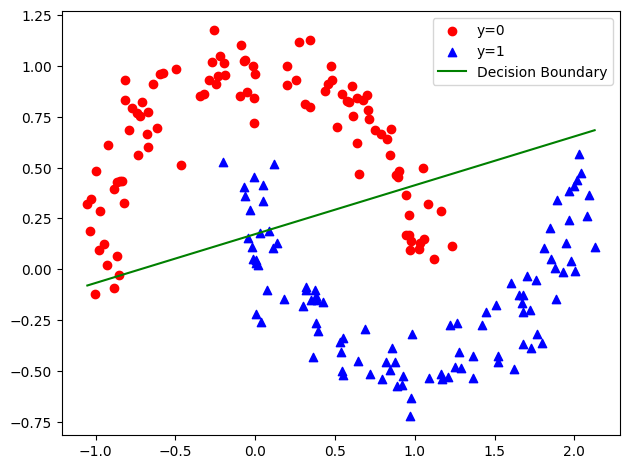

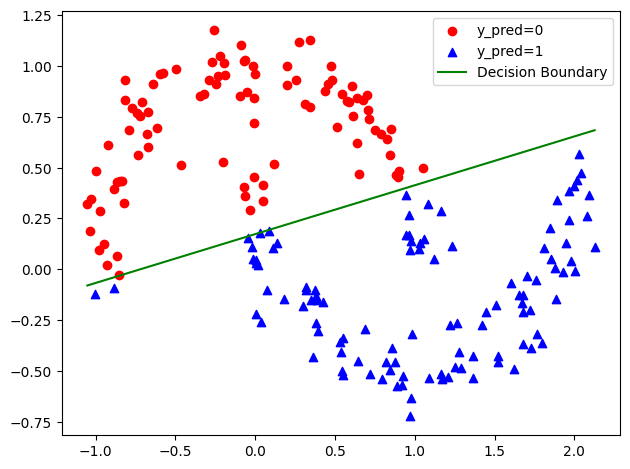

In [6]:
for i, c, m in zip(range(2),['red', 'blue'], ['o', '^']):
    plt.scatter(X[:,0][Y==i],X[:,1][Y==i], color = c, marker = m, label = 'y='+str(i))

x1_min, x1_max = X[:, 0].min() , X[:, 0].max() 
x1_values = np.linspace(x1_min, x1_max, 200)
x2_values = (-w[0] * x1_values - b) / w[1]
plt.plot(x1_values, x2_values, 'g-', label='Decision Boundary')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
for i, c, m in zip(range(2),['red', 'blue'], ['o', '^']):
    plt.scatter(X[:,0][y_pred==i],X[:,1][y_pred==i], color = c, marker = m, label = 'y_pred='+str(i))

x1_min, x1_max = X[:, 0].min() , X[:, 0].max() 
x1_values = np.linspace(x1_min, x1_max, 200)
x2_values = (-w[0] * x1_values - b) / w[1]
plt.plot(x1_values, x2_values, 'g-', label='Decision Boundary')
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

We can see how our SVC performed a linear classification. We can also see the 23 points it classified wrong.

### 3) Apply kernel functions

In [7]:
def mapping(x):

    x_1 = x[:,0]**3
    x_2 = np.sqrt(3)*(x[:,0]**2)*x[:,1]
    x_3 = np.sqrt(3)*(x[:,1]**2)*x[:,0]
    x_4 = x[:,1]**2

    trans_x = np.column_stack([x_1, x_2, x_3, x_4])
    
    return trans_x

kernel1 = mapping(X)
kernel1.shape

(200, 4)

In [8]:
def kernel_func(X, Y, degree=3, gamma=1, coef=1):
    K = np.dot(X, Y.T)
    K *= gamma
    K += coef
    K **= degree
    return K

kernel2 = kernel_func(X, X)
kernel2.shape

(200, 200)

In [9]:
clf_k1 = SVM(learning_rate=1e-1, lambda_param=1e-5, n_iters=1000)
clf_k1.fit(kernel1, Y)
y_pred, w, b = clf_k1.predict(kernel1)
print(f'Accuracy score of poly kernel 1: {accuracy_score(Y,y_pred)*100}%')

Accuracy score of poly kernel 1: 93.0%


In [10]:
clf_k2 = SVM(learning_rate=1e-1, lambda_param=1e-5, n_iters=1000)
clf_k2.fit(kernel2, Y)
y_pred, w, b = clf_k2.predict(kernel2)
print(f'Accuracy score of poly kernel 2: {accuracy_score(Y,y_pred)*100}%')

Accuracy score of poly kernel 2: 99.5%


### 4) Validation

In [11]:
x_v, y_v = datasets.make_moons(n_samples = 50, noise=0.1, random_state = 3)

In [12]:
y_pred, w, b = clf_linear.predict(x_v)
print(f'Accuracy score of linear kernel on validation set: {accuracy_score(y_v,y_pred)*100}%')

Accuracy score of linear kernel on validation set: 84.0%


In [13]:
y_pred, w, b = clf_k1.predict(mapping(x_v))
print(f'Accuracy score of poly kernel 1 on validation set: {accuracy_score(y_v,y_pred)*100}%')

Accuracy score of poly kernel 1 on validation set: 88.0%


In [14]:
y_pred, w, b = clf_k2.predict(kernel_func(x_v, X))
print(f'Accuracy score of poly kernel 2 on validation set: {accuracy_score(y_v,y_pred)*100}%')

Accuracy score of poly kernel 2 on validation set: 98.0%
